# Looker Ecommerce Big Query EDA


| Objective                                     | Description                                                                                                                |
|-----------------------------------------------|----------------------------------------------------------------------------------------------------------------------------|
| **1. Sales Analysis:**                        | - Analyze sales trends over time (daily, weekly, monthly, yearly).                                                        |
|                                               | - Identify peak sales periods and seasonal trends.                                                                         |
|                                               | - Compare sales performance across different product categories, brands, and departments.                                 |
| **2. Product Performance:**                   | - Determine the best-selling products.                                                                                    |
|                                               | - Analyze the performance of each product category, brand, and department.                                                 |
|                                               | - Identify products with high profit margins or low costs.                                                                 |
| **3. Customer Behavior:**                     | - Analyze customer buying patterns and behaviors.                                                                          |
|                                               | - Segment customers based on their purchasing frequency, basket size, or loyalty.                                           |
|                                               | - Identify trends in customer demographics and preferences.                                                                |
| **4. Inventory Management:**                  | - Analyze inventory turnover rates.                                                                                       |
|                                               | - Identify slow-moving or obsolete inventory.                                                                              |
|                                               | - Optimize inventory levels to meet demand without excess stock.                                                           |
| **5. Price Optimization:**                    | - Analyze the relationship between product prices and sales volumes.                                                      |
|                                               | - Determine optimal pricing strategies for different product categories or brands.                                        |
|                                               | - Monitor price elasticity and competitor pricing.                                                                         |
| **6. Marketing Effectiveness:**               | - Evaluate the impact of marketing campaigns on sales.                                                                     |
|                                               | - Analyze customer acquisition and retention rates.                                                                        |
|                                               | - Determine the ROI of marketing activities across different channels.                                                     |
| **7. Supply Chain Analysis:**                 | - Track product distribution and fulfillment efficiency.                                                                   |
|                                               | - Identify bottlenecks or inefficiencies in the supply chain.                                                              |
|                                               | - Optimize shipping and delivery processes.                                                                                |
| **8. Customer Satisfaction:**                 | - Analyze product returns and customer complaints.                                                                         |
|                                               | - Monitor customer reviews and ratings.                                                                                    |
|                                               | - Identify opportunities for improving product quality or customer service.                                                |
| **9. Cross-Selling and Upselling:**           | - Identify opportunities for cross-selling related products.                                                               |
|                                               | - Analyze the effectiveness of upselling techniques.                                                                       |
|                                               | - Personalize product recommendations based on customer behavior.                                                           |
| **10. Forecasting and Predictive Analytics:** | - Forecast future sales based on historical data and trends.                                                               |
|                                               | - Predict customer demand for specific products or categories.                                                            |
|                                               | - Use predictive analytics to anticipate market trends or changes in customer behavior.                                    |
 market trends or changes in customer behavior.
te market trends or changes in customer behavior.te market trends or changes in customer behavior.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import autoreload
import missingno as msno
import csv
import os
import sys

from collections import defaultdict, Counter

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.float_format', lambda x: '%.0f' % x)

sb.set_style('darkgrid')


In [2]:
# date_parse = lambda x: pd.to_datetime(x, format='%Y-%m-%d %H:%M:%S%z')
df = pd.read_csv("D:\Open Classroom\Datasets\Looker Ecommerce BigQuery Dataset\inventory_items.csv", parse_dates=['created_at', 'sold_at']) #, date_parser=date_parse)
df.head()

,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id
0,67971,13844,2022-07-02 07:09:20+00:00,2022-07-24 06:33:20+00:00,3,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,7,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
1,67972,13844,2023-12-20 03:28:00+00:00,NaN,3,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,7,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
2,67973,13844,2023-06-04 02:53:00+00:00,NaN,3,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,7,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
3,72863,13844,2021-10-16 22:58:52+00:00,2021-11-22 02:19:52+00:00,3,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,7,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
4,72864,13844,2021-08-07 16:33:00+00:00,NaN,3,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,7,Women,2A3E953A5E3D81E67945BCE5519F84C8,7


### Data Cleaning & Manipulation

In [3]:
df.shape

(490705, 12)

In [4]:
df.isnull().sum()

id                                     0
product_id                             0
created_at                             0
sold_at                           308946
cost                                   0
product_category                       0
product_name                          29
product_brand                        401
product_retail_price                   0
product_department                     0
product_sku                            0
product_distribution_center_id         0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490705 entries, 0 to 490704
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              490705 non-null  int64  
 1   product_id                      490705 non-null  int64  
 2   created_at                      490705 non-null  object 
 3   sold_at                         181759 non-null  object 
 4   cost                            490705 non-null  float64
 5   product_category                490705 non-null  object 
 6   product_name                    490676 non-null  object 
 7   product_brand                   490304 non-null  object 
 8   product_retail_price            490705 non-null  float64
 9   product_department              490705 non-null  object 
 10  product_sku                     490705 non-null  object 
 11  product_distribution_center_id  490705 non-null  int64  
dtypes: float64(2), i

<Axes: >

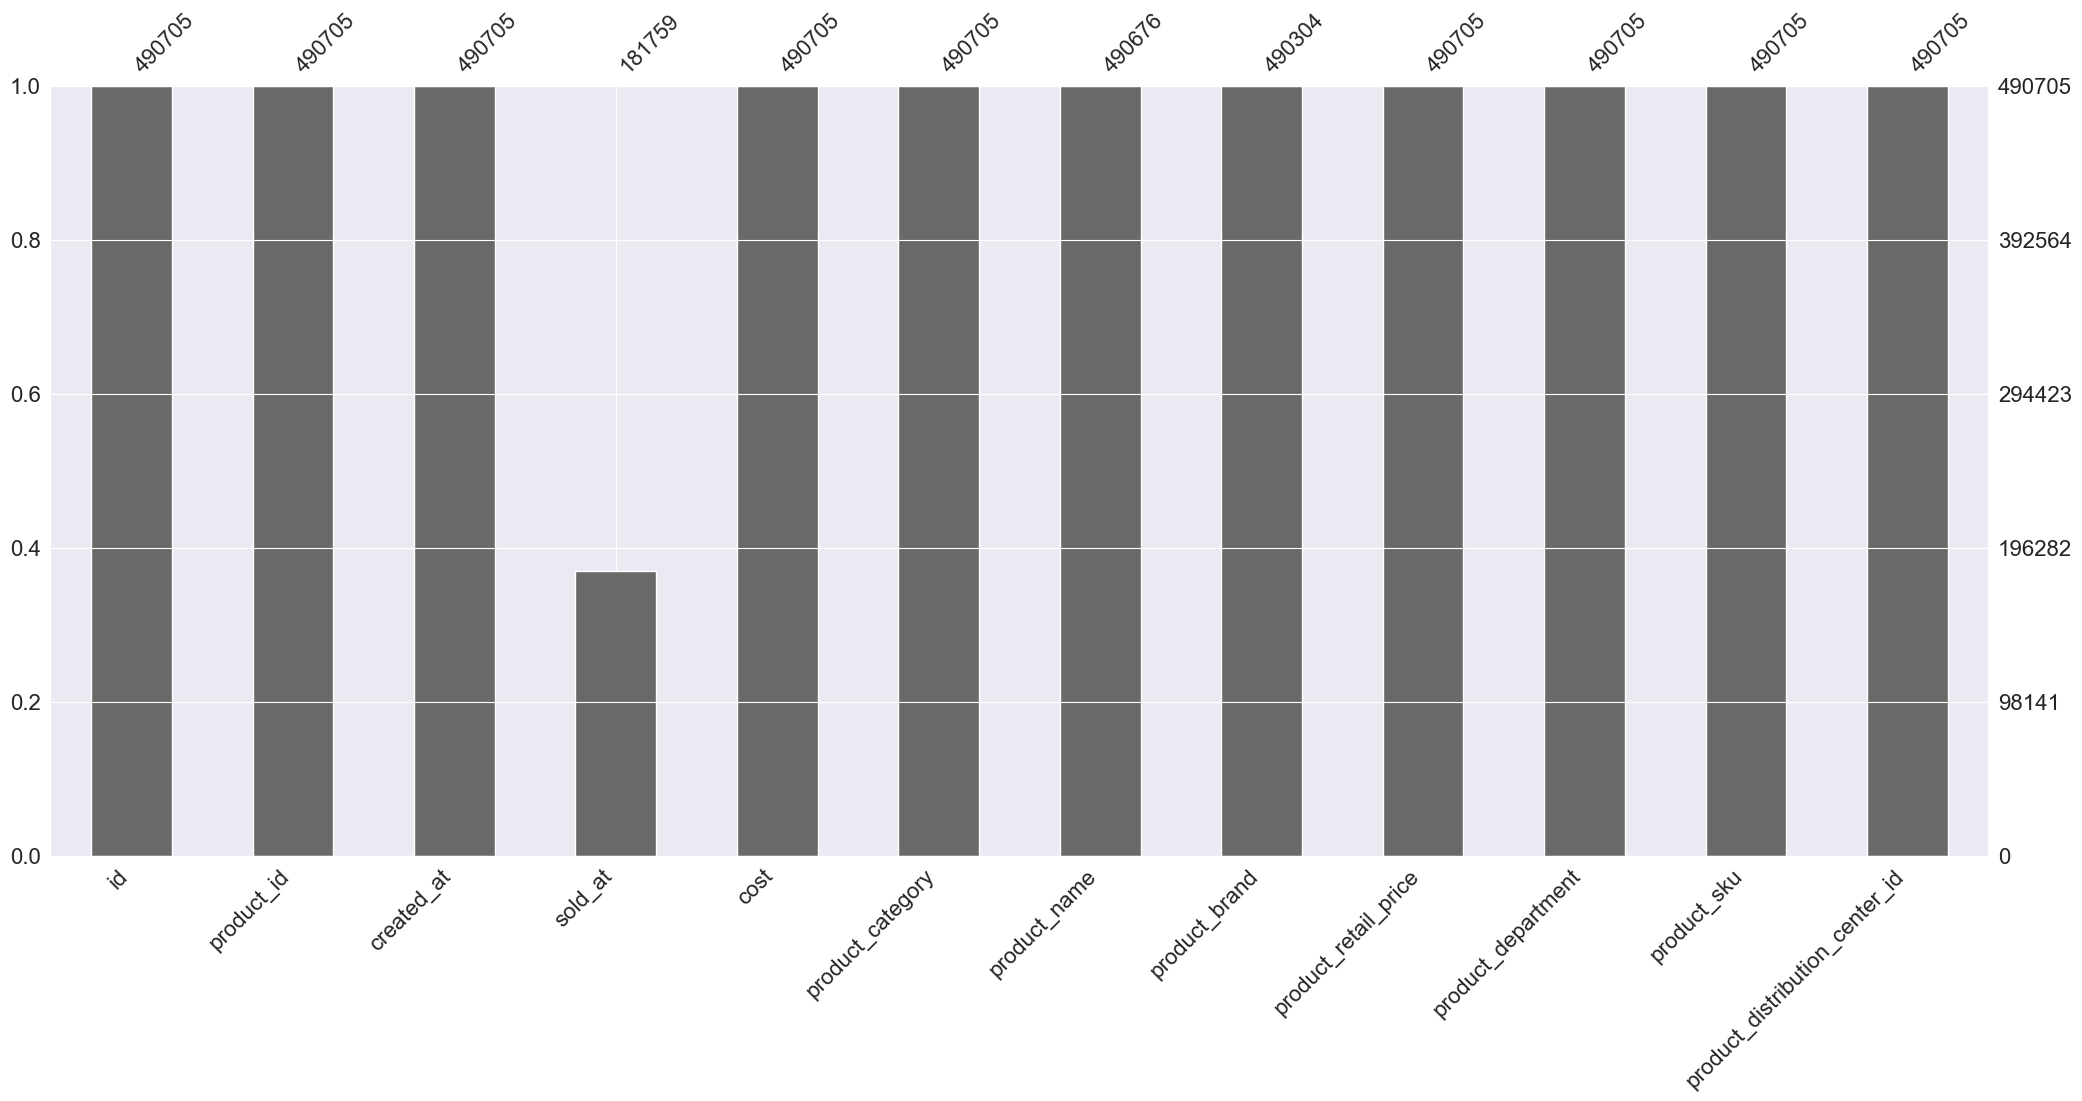

In [6]:
msno.bar(df)

In [7]:
df.head(3)

,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id
0,67971,13844,2022-07-02 07:09:20+00:00,2022-07-24 06:33:20+00:00,3,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,7,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
1,67972,13844,2023-12-20 03:28:00+00:00,NaN,3,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,7,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
2,67973,13844,2023-06-04 02:53:00+00:00,NaN,3,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,7,Women,2A3E953A5E3D81E67945BCE5519F84C8,7


In [8]:
df['created_at_date'] = df['created_at'].str[0:10]
df['created_at_time'] = df['created_at'].str[10:18]

df['sold_at_date'] = df['sold_at'].str[0:10]
df['sold_at_time'] = df['sold_at'].str[10:18]

df.head()

,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id,created_at_date,created_at_time,sold_at_date,sold_at_time
0,67971,13844,2022-07-02 07:09:20+00:00,2022-07-24 06:33:20+00:00,3,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,7,Women,2A3E953A5E3D81E67945BCE5519F84C8,7,2022-07-02,07:09:2,2022-07-24,06:33:2
1,67972,13844,2023-12-20 03:28:00+00:00,NaN,3,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,7,Women,2A3E953A5E3D81E67945BCE5519F84C8,7,2023-12-20,03:28:0,NaN,NaN
2,67973,13844,2023-06-04 02:53:00+00:00,NaN,3,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,7,Women,2A3E953A5E3D81E67945BCE5519F84C8,7,2023-06-04,02:53:0,NaN,NaN
3,72863,13844,2021-10-16 22:58:52+00:00,2021-11-22 02:19:52+00:00,3,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,7,Women,2A3E953A5E3D81E67945BCE5519F84C8,7,2021-10-16,22:58:5,2021-11-22,02:19:5
4,72864,13844,2021-08-07 16:33:00+00:00,NaN,3,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,7,Women,2A3E953A5E3D81E67945BCE5519F84C8,7,2021-08-07,16:33:0,NaN,NaN


In [9]:
date_format = "%H:%M:%S"

df['created_at_date'] = pd.to_datetime(df['created_at_date'])
# df['created_at_time'] = pd.to_datetime(df['created_at_time']).dt.time

df['sold_at_date'] = pd.to_datetime(df['sold_at_date'])
# df['sold_at_time'] = pd.to_datetime(df['sold_at_time']).dt.time

In [10]:
df.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              5 non-null      int64         
 1   product_id                      5 non-null      int64         
 2   created_at                      5 non-null      object        
 3   sold_at                         2 non-null      object        
 4   cost                            5 non-null      float64       
 5   product_category                5 non-null      object        
 6   product_name                    5 non-null      object        
 7   product_brand                   5 non-null      object        
 8   product_retail_price            5 non-null      float64       
 9   product_department              5 non-null      object        
 10  product_sku                     5 non-null      object        
 11  product_di

In [11]:
df.drop(columns=['created_at', 'sold_at', 'product_sku'], inplace = True)

In [12]:
df.head()

,id,product_id,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_distribution_center_id,created_at_date,created_at_time,sold_at_date,sold_at_time
0,67971,13844,3,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,7,Women,7,2022-07-02,07:09:2,2022-07-24,06:33:2
1,67972,13844,3,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,7,Women,7,2023-12-20,03:28:0,NaT,NaN
2,67973,13844,3,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,7,Women,7,2023-06-04,02:53:0,NaT,NaN
3,72863,13844,3,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,7,Women,7,2021-10-16,22:58:5,2021-11-22,02:19:5
4,72864,13844,3,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,7,Women,7,2021-08-07,16:33:0,NaT,NaN


In [13]:
df['product_distribution_center_id'].value_counts()

product_distribution_center_id
1     65116
2     64522
3     61218
8     50152
4     46709
9     45577
7     45377
6     43962
5     35803
10    32269
Name: count, dtype: int64

In [14]:
sold_at_date_vals = df['sold_at_date'].mean()
df['sold_at_date'] = df['sold_at_date'].fillna(value = sold_at_date_vals, axis = 'index')

In [15]:
df.isnull().sum()

id                                     0
product_id                             0
cost                                   0
product_category                       0
product_name                          29
product_brand                        401
product_retail_price                   0
product_department                     0
product_distribution_center_id         0
created_at_date                        0
created_at_time                        0
sold_at_date                           0
sold_at_time                      308946
dtype: int64

In [16]:
# sold_at_time_vals = df['sold_at_time'].mean()
# df['sold_at_time'] = df['sold_at_time'].fillna(value = sold_at_time_vals, axis = 'index')

In [17]:
df.isnull().sum()

id                                     0
product_id                             0
cost                                   0
product_category                       0
product_name                          29
product_brand                        401
product_retail_price                   0
product_department                     0
product_distribution_center_id         0
created_at_date                        0
created_at_time                        0
sold_at_date                           0
sold_at_time                      308946
dtype: int64

In [18]:
df['sales_day'] = df['sold_at_date'].dt.day_name()
df['sales_month'] = df['sold_at_date'].dt.month_name()
df['sales_year'] = df['sold_at_date'].dt.year

df.head()

,id,product_id,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_distribution_center_id,created_at_date,created_at_time,sold_at_date,sold_at_time,sales_day,sales_month,sales_year
0,67971,13844,3,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,7,Women,7,2022-07-02,07:09:2,2022-07-24 00:00:00.000000000,06:33:2,Sunday,July,2022
1,67972,13844,3,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,7,Women,7,2023-12-20,03:28:0,2022-10-24 07:44:52.389372672,NaN,Monday,October,2022
2,67973,13844,3,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,7,Women,7,2023-06-04,02:53:0,2022-10-24 07:44:52.389372672,NaN,Monday,October,2022
3,72863,13844,3,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,7,Women,7,2021-10-16,22:58:5,2021-11-22 00:00:00.000000000,02:19:5,Monday,November,2021
4,72864,13844,3,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,7,Women,7,2021-08-07,16:33:0,2022-10-24 07:44:52.389372672,NaN,Monday,October,2022


## 1. Sales Analysis
### 	- Analyze sales trends over time (daily, weekly, monthly, yearly).

In [19]:
date_index_df = df.copy()
date_index_df.set_index('sold_at_date', inplace = True)

In [20]:
date_index_df.head()

,id,product_id,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_distribution_center_id,created_at_date,created_at_time,sold_at_time,sales_day,sales_month,sales_year
sold_at_date,,,,,,,,,,,,,,,
2022-07-24 00:00:00.000000000,67971,13844,3,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,7,Women,7,2022-07-02,07:09:2,06:33:2,Sunday,July,2022
2022-10-24 07:44:52.389372672,67972,13844,3,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,7,Women,7,2023-12-20,03:28:0,NaN,Monday,October,2022
2022-10-24 07:44:52.389372672,67973,13844,3,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,7,Women,7,2023-06-04,02:53:0,NaN,Monday,October,2022
2021-11-22 00:00:00.000000000,72863,13844,3,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,7,Women,7,2021-10-16,22:58:5,02:19:5,Monday,November,2021
2022-10-24 07:44:52.389372672,72864,13844,3,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,7,Women,7,2021-08-07,16:33:0,NaN,Monday,October,2022


Text(0.5, 1.0, 'Total Sales per Day')

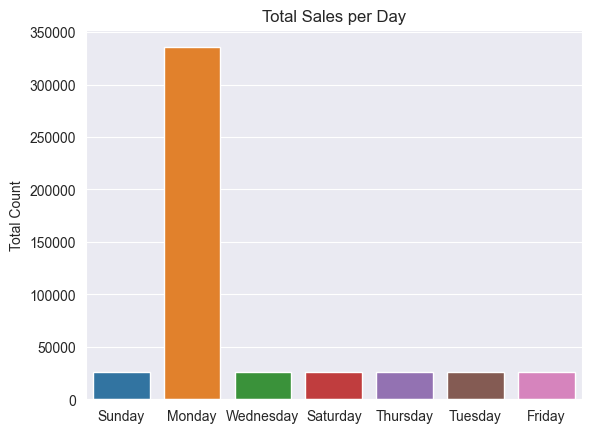

In [21]:
sb.countplot(x = df['sales_day'])
plt.xlabel(None)
plt.ylabel('Total Count')
plt.title('Total Sales per Day')

Text(0, 0.5, 'total_sales')

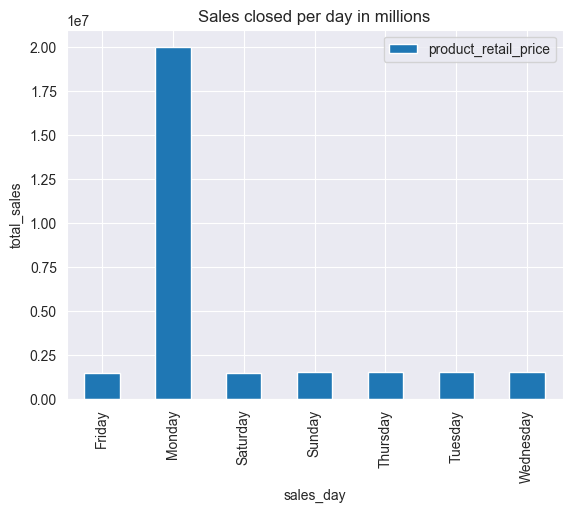

In [22]:
sales_made_daily = date_index_df.groupby('sales_day')
sales_made_daily['product_retail_price'].sum().to_frame().head(50).plot(kind = 'bar')
plt.title('Sales closed per day in millions')
plt.ylabel('total_sales')

Text(0, 0.5, 'total_sales')

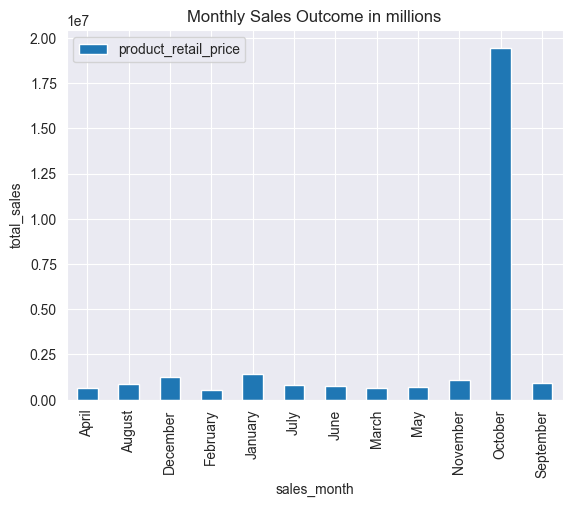

In [23]:
sales_per_month = date_index_df.groupby('sales_month')
sales_per_month['product_retail_price'].sum().to_frame().head(50).plot(kind = 'bar')
sales_per_month['product_retail_price'].sum().to_frame().head(50).sort_values(by='product_retail_price', ascending = True)
plt.title('Monthly Sales Outcome in millions')
plt.ylabel('total_sales')

Text(0, 0.5, 'total_sales')

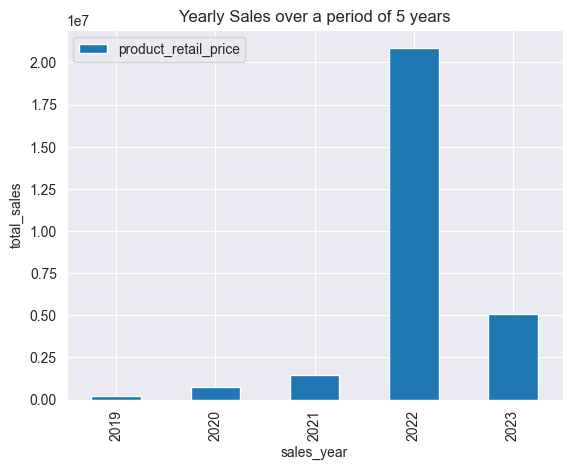

In [24]:
sales_per_year = date_index_df.groupby('sales_year')
sales_per_year['product_retail_price'].sum().head()
sales_per_year['product_retail_price'].sum().head().to_frame().plot(kind='bar')
plt.title('Yearly Sales over a period of 5 years')
plt.ylabel('total_sales')

In [25]:
seasons_mapping = {
    'March': 'spring', 'April': 'spring', 'May': 'spring',
    'June': 'summer', 'July': 'summer', 'August': 'summer',
    'September': 'autumn', 'October': 'autumn', 'November': 'autumn',
    'December': 'winter', 'January': 'winter', 'February': 'winter'
}

def get_seasons(df, col):
    df['seasons'] = df[col].map(seasons_mapping).fillna('NA')


In [26]:
get_seasons(date_index_df, 'sales_month')

In [27]:
date_index_df.head()

,id,product_id,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_distribution_center_id,created_at_date,created_at_time,sold_at_time,sales_day,sales_month,sales_year,seasons
sold_at_date,,,,,,,,,,,,,,,,
2022-07-24 00:00:00.000000000,67971,13844,3,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,7,Women,7,2022-07-02,07:09:2,06:33:2,Sunday,July,2022,summer
2022-10-24 07:44:52.389372672,67972,13844,3,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,7,Women,7,2023-12-20,03:28:0,NaN,Monday,October,2022,autumn
2022-10-24 07:44:52.389372672,67973,13844,3,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,7,Women,7,2023-06-04,02:53:0,NaN,Monday,October,2022,autumn
2021-11-22 00:00:00.000000000,72863,13844,3,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,7,Women,7,2021-10-16,22:58:5,02:19:5,Monday,November,2021,autumn
2022-10-24 07:44:52.389372672,72864,13844,3,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,7,Women,7,2021-08-07,16:33:0,NaN,Monday,October,2022,autumn


Text(0, 0.5, 'total_sales')

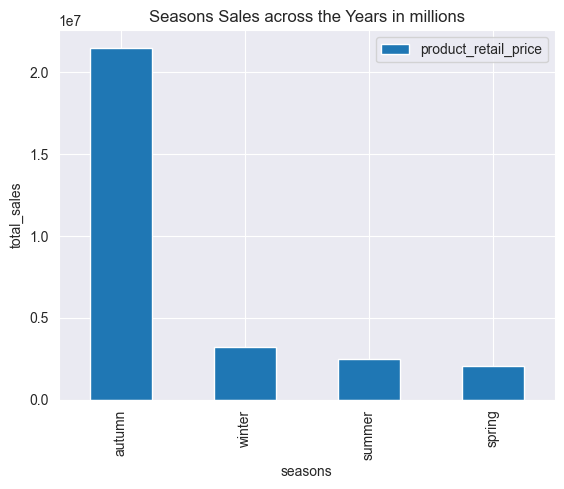

In [28]:
seasons_sales = date_index_df.groupby('seasons')
seasons_sales['product_retail_price'].sum().sort_values(ascending = False).head().to_frame()
seasons_sales['product_retail_price'].sum().sort_values(ascending = False).head().to_frame().plot(kind = 'bar')
plt.title('Seasons Sales across the Years in millions')
plt.ylabel('total_sales')

In [29]:
date_index_df.reset_index(drop=True, inplace = True)

In [30]:
date_index_df.head()

,id,product_id,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_distribution_center_id,created_at_date,created_at_time,sold_at_time,sales_day,sales_month,sales_year,seasons
0,67971,13844,3,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,7,Women,7,2022-07-02,07:09:2,06:33:2,Sunday,July,2022,summer
1,67972,13844,3,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,7,Women,7,2023-12-20,03:28:0,NaN,Monday,October,2022,autumn
2,67973,13844,3,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,7,Women,7,2023-06-04,02:53:0,NaN,Monday,October,2022,autumn
3,72863,13844,3,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,7,Women,7,2021-10-16,22:58:5,02:19:5,Monday,November,2021,autumn
4,72864,13844,3,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,7,Women,7,2021-08-07,16:33:0,NaN,Monday,October,2022,autumn


sold_at_date
24   64
15    1
14    1
16    1
17    1
13    1
12    1
5     1
11    1
18    1
7     1
4     1
6     1
8     1
9     1
10    1
3     1
19    1
2     1
20    1
1     1
21    1
26    1
28    1
23    1
22    1
25    1
27    1
29    1
30    1
31    1
Name: proportion, dtype: float64

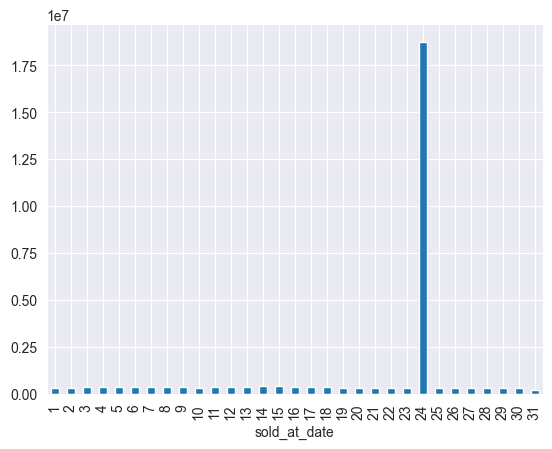

In [31]:
sales_per_day = df.groupby(df['sold_at_date'].dt.day)
sales_per_day['product_retail_price'].sum().plot(kind='bar')
sales_per_day['product_retail_price'].sum()#.value_counts(normalize = True)
df['sold_at_date'].dt.day.value_counts(normalize=True) * 100

### - Compare sales performance across different product categories, brands, and departments

In [32]:
df.head()

,id,product_id,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_distribution_center_id,created_at_date,created_at_time,sold_at_date,sold_at_time,sales_day,sales_month,sales_year
0,67971,13844,3,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,7,Women,7,2022-07-02,07:09:2,2022-07-24 00:00:00.000000000,06:33:2,Sunday,July,2022
1,67972,13844,3,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,7,Women,7,2023-12-20,03:28:0,2022-10-24 07:44:52.389372672,NaN,Monday,October,2022
2,67973,13844,3,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,7,Women,7,2023-06-04,02:53:0,2022-10-24 07:44:52.389372672,NaN,Monday,October,2022
3,72863,13844,3,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,7,Women,7,2021-10-16,22:58:5,2021-11-22 00:00:00.000000000,02:19:5,Monday,November,2021
4,72864,13844,3,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,7,Women,7,2021-08-07,16:33:0,2022-10-24 07:44:52.389372672,NaN,Monday,October,2022


In [33]:
product_category = df.groupby('product_category')
product_category[['product_name', 'product_retail_price']].sum().head(10).sort_values(by='product_retail_price', ascending=False).rename(columns = {'product_retail_price':'total_sales'}, inplace=True)

In [34]:
product_brand = df.groupby('product_brand')
product_brand[['product_name', 'product_retail_price']].sum().head(10).sort_values(by='product_retail_price', ascending=False).rename(columns = {'product_retail_price':'total_sales'})

,product_name,total_sales
product_brand,,
!it Jeans,!iT Jeans Women's Curvy Slim Boot Jean!iT Jean...,11742
180s,180's Men's Metro Ear Warmers - Black180's Men...,8958
10 Deep,10 Deep - Mens Infield Hoody Hoodie In Black10...,1247
106Shades,2 Tone Nerdy Geek Eye Glasses2 Tone Nerdy Geek...,1114
007Lingerie,Women's Microfiber Cropped Cami w/ Spaghetti S...,943
'47 Brand,47 Brand Women's Pep Rally OU Hoodie Cardinal4...,897
12XLShop Inc.,12XLShop Hooded Sweat Jacket with Tribal Motif...,878
1WorldSarong,Ladies' Hawaiian Swimsuit Cover-up Sarong- by ...,748
1veMoon,1veMoon Fashion Faux Fur Hoodies 3 Colors1veMo...,570


In [35]:
product_department = df.groupby('product_department')
get_dept = product_department.get_group('Women')
# product_department[get_dept['product_name'].value_counts()]
get_brand = get_dept.groupby('product_brand')
get_brand['product_retail_price'].sum().to_frame().sort_values(by='product_retail_price', ascending=False).rename(columns={'product_retail_price':'total_sales'}).head(20)


#product_department[['product_name', 'product_retail_price']].sum().head(10).sort_values(by='product_retail_price', ascending=False).rename({'product_retail_price':'total_sales'})

,total_sales
product_brand,
7 For All Mankind,208936
Calvin Klein,199491
Jones New York,193639
True Religion,178461
Allegra K,160165
Anne Klein,154431
BCBGMAXAZRIA,152198
Ray-Ban,147669
Not Your Daughter's Jeans,129031


In [36]:
get_prod = get_dept.groupby('product_name')
get_prod['product_retail_price'].sum().to_frame().sort_values(by='product_retail_price', ascending=False).rename(columns={'product_retail_price':'total_sales'}).head(20)


,total_sales
product_name,
NIKE WOMEN'S PRO COMPRESSION SPORTS BRA *Outstanding Support and Comfort*,45150
Canada Goose Women's Solaris,36835
Nobis Merideth Parka,31800
The North Face Denali Down Womens Jacket 2013,31605
Canada Goose Women's Mystique,30000
Catherine Malandrino Women's Skinny Stretch Leather Pant,20585
Rebecca Taylor Women's Lace Dress,19750
Canada Goose Women's Expedition Parka,19080
True Religion Women's Casey Stretch Leather Pants,16680


## 2. Product Performance:	
### - Determine the best-selling products.

In [37]:
df.head()
df2 = df.copy()

In [38]:
df2['cost_diff'] = df2['product_retail_price'] - df2['cost']
df2['pct_diff'] = (df2['cost_diff']/df2['cost']) * 100

In [39]:
df2.head()

,id,product_id,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_distribution_center_id,created_at_date,created_at_time,sold_at_date,sold_at_time,sales_day,sales_month,sales_year,cost_diff,pct_diff
0,67971,13844,3,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,7,Women,7,2022-07-02,07:09:2,2022-07-24 00:00:00.000000000,06:33:2,Sunday,July,2022,4,153
1,67972,13844,3,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,7,Women,7,2023-12-20,03:28:0,2022-10-24 07:44:52.389372672,NaN,Monday,October,2022,4,153
2,67973,13844,3,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,7,Women,7,2023-06-04,02:53:0,2022-10-24 07:44:52.389372672,NaN,Monday,October,2022,4,153
3,72863,13844,3,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,7,Women,7,2021-10-16,22:58:5,2021-11-22 00:00:00.000000000,02:19:5,Monday,November,2021,4,153
4,72864,13844,3,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,7,Women,7,2021-08-07,16:33:0,2022-10-24 07:44:52.389372672,NaN,Monday,October,2022,4,153


In [40]:
product_diff = df2.groupby(df2['product_name'])
product_diff = product_diff.agg({'cost':'sum', 'cost_diff':'sum'}).sort_values(by='cost_diff', ascending=False).rename(columns={'cost_diff':'profit_margin'}).head(20)
product_diff

,cost,profit_margin
product_name,,
The North Face Apex Bionic Soft Shell Jacket - Men's,27291,30501
NIKE WOMEN'S PRO COMPRESSION SPORTS BRA *Outstanding Support and Comfort*,22242,22908
Canada Goose Women's Solaris,14275,22560
Canada Goose Men's The Chateau Jacket,16703,20787
The North Face Apex Bionic Mens Soft Shell Ski Jacket 2013,15956,18358
Canada Goose Women's Mystique,12457,17543
The North Face Denali Down Womens Jacket 2013,14715,16890
Nobis Merideth Parka,15296,16504
The North Face Nuptse 2 Jacket Deep Water Blue Mens,9923,14458


Text(0.5, 0, '')

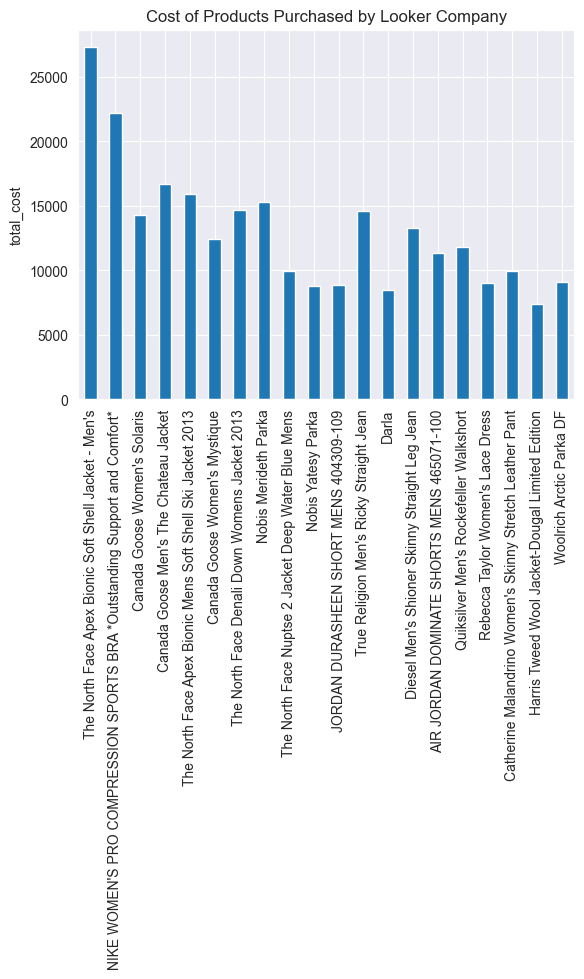

In [41]:
product_diff['cost'].plot(kind = 'bar')#.sort_values(by='cost', ascending=False)
plt.title('Cost of Products Purchased by Looker Company')
plt.ylabel('total_cost')
plt.xlabel(None)

Text(0.5, 0, '')

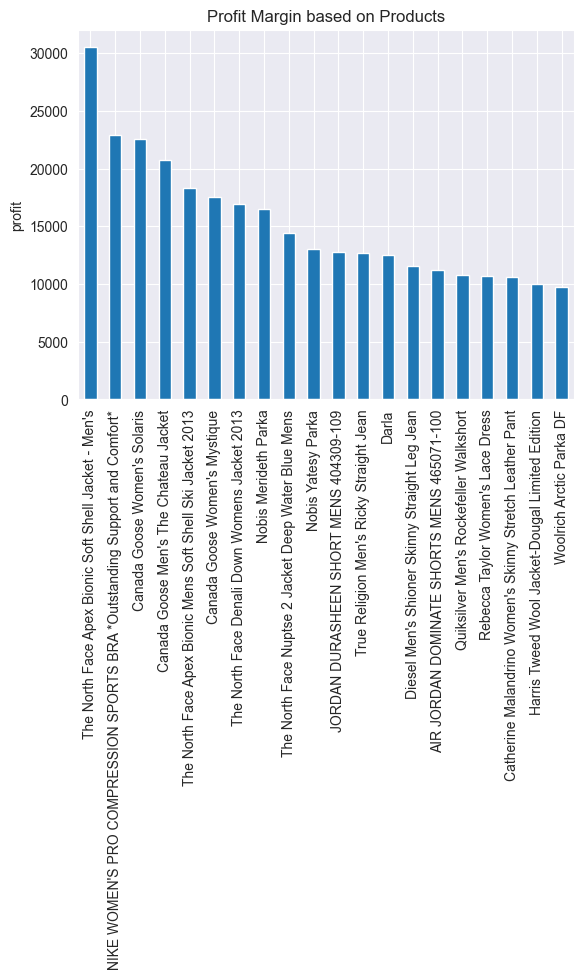

In [45]:
product_diff['profit_margin'].plot(kind = 'bar')#.sort_values(by='cost', ascending=False)
plt.title('Profit Margin based on Products')
plt.ylabel('profit')
plt.xlabel(None)

### - Analyze the performance of each product category, brand, and department.

In [ ]:
product